<a href="https://colab.research.google.com/github/ayushve/Complete-Python-3-Bootcamp/blob/DLNLP/Group_13_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from sklearn.impute import SimpleImputer

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
path = "/gdrive/MyDrive/deeplearning/world-data-2023.csv"

In [ ]:
# Load dataset
data = pd.read_csv(path)



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [ ]:
data.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [ ]:
columns_to_remove = ["Country","Abbreviation", "Calling Code", "Currency-Code", "Capital/Major City", "Largest city", "Official language" ]
data_c = data.drop(columns=columns_to_remove) #cleaned data
data_c

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,60,58.10%,"652,230","323,000",32.49,"8,672",149.9,2.30%,4.47,2.10%,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,105,43.10%,"28,748","9,000",11.78,"4,536",119.05,1.40%,1.62,28.10%,...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,18,17.40%,"2,381,741","317,000",24.28,"150,006",151.36,2.00%,3.02,0.80%,...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,164,40.00%,468,NaN,7.20,469,NaN,NaN,1.27,34.00%,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,26,47.50%,"1,246,700","117,000",40.73,"34,693",261.73,17.10%,5.52,46.30%,...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,32,24.50%,"912,050","343,000",17.88,"164,175","2,740.27",254.90%,2.27,52.70%,...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,314,39.30%,"331,210","522,000",16.75,"192,668",163.52,2.80%,2.05,48.10%,...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,56,44.60%,"527,968","40,000",30.45,"10,609",157.58,8.10%,3.79,1.00%,...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,25,32.10%,"752,618","16,000",36.19,"5,141",212.31,9.20%,4.63,65.20%,...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [ ]:
data_c.columns

Index(['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI',
       'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
chars_to_remove=[',','$', '%']
cols_to_clean=['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI',
       'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'Latitude', 'Longitude']

for cols in cols_to_clean:
  data_c[cols] = data_c[cols].astype(str)
  for item in chars_to_remove:
    data_c[cols]=data_c[cols].str.replace(item,'')

<ipython-input-104-df961b6dfd31>:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_c[cols]=data_c[cols].str.replace(item,'')


In [ ]:
data_c=data_c.apply(pd.to_numeric, errors='coerce')


In [ ]:
data_c.head()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,60,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,4.47,2.1,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,105,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,1.62,28.1,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,18,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,3.02,0.8,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,164,40.0,468.0,NaN,7.20,469.0,NaN,NaN,1.27,34.0,...,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,26,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,5.52,46.3,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


In [ ]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Density
(P/Km2)                            195 non-null    int64  
 1   Agricultural Land( %)                      188 non-null    float64
 2   Land Area(Km2)                             194 non-null    float64
 3   Armed Forces size                          171 non-null    float64
 4   Birth Rate                                 189 non-null    float64
 5   Co2-Emissions                              188 non-null    float64
 6   CPI                                        178 non-null    float64
 7   CPI Change (%)                             179 non-null    float64
 8   Fertility Rate                             188 non-null    float64
 9   Forested Area (%)                          188 non-null    float64
 10  Gasoline Price            

In [ ]:
# Handle missing values
data_c.isnull().sum()


Density\n(P/Km2)                              0
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Life expectancy                               8
Maternal mortality ratio                     14
Minimum wage                                 45
Out of pocket health expenditure              7
Physicians per thousand                       7
Population                              

In [ ]:
columns_m =[ 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI',
       'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'Latitude', 'Longitude']
imputer = SimpleImputer(strategy="mean")
# Impute missing values for selected columns
data_imputed = data_c.copy()
data_imputed[columns_m] = imputer.fit_transform(data_imputed[columns_m])

In [ ]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Density
(P/Km2)                            195 non-null    int64  
 1   Agricultural Land( %)                      195 non-null    float64
 2   Land Area(Km2)                             195 non-null    float64
 3   Armed Forces size                          195 non-null    float64
 4   Birth Rate                                 195 non-null    float64
 5   Co2-Emissions                              195 non-null    float64
 6   CPI                                        195 non-null    float64
 7   CPI Change (%)                             195 non-null    float64
 8   Fertility Rate                             195 non-null    float64
 9   Forested Area (%)                          195 non-null    float64
 10  Gasoline Price            

In [ ]:
# Split data into features and target
features = data_imputed.drop(columns=["GDP"])
target = data_imputed["GDP"]



In [ ]:
fea=['Longitude','Latitude','Population','Birth Rate','Unemployment rate', 'Minimum wage', 'Fertility Rate', 'Life expectancy','Forested Area (%)',
     'CPI', 'Co2-Emissions' ]

In [ ]:
preprocessor = make_column_transformer(
                                        (StandardScaler(), fea),
                                        )

In [ ]:
ss=StandardScaler()

In [ ]:
data_scaled=ss.fit_transform(features[fea])

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)



In [ ]:
X_train.shape
X_test.shape

(156, 11)

(39, 11)

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [ ]:
#model = tf.keras.Sequential()

In [ ]:
#model.add( tf.keras.layers.Input(shape = (data_scaled.shape[1],)))

In [ ]:
#model.add(tf.keras.layers.Dense(128, activation = 'relu'))

In [ ]:
#model.add(tf.keras.layers.Dense(64, activation = 'relu'))

In [ ]:
#model.add(tf.keras.layers.Dense(32, activation= 'relu'))

In [ ]:
#model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
#model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 256)               7168      
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 1)                 65        
                                                                 
Total params: 48,385
Trainable params: 48,385
Non-trainable params: 0
_________________________________________________________________


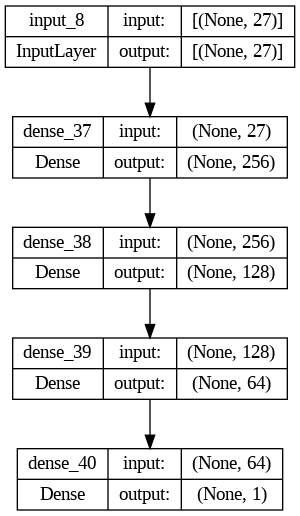

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
model.compile(
                 loss = 'binary_crossentropy',
                 optimizer = 'adam',  # Try first with default optimizer and then with 'adam'
                                      #  may not make much difference
                 metrics = ['acc']
              )

In [ ]:
model.fit( X_train, y_train, epochs=300)

Epoch 1/300
5/5 [==============================] - 1s 4ms/step - loss: -772843044864.0000 - acc: 0.0000e+00
Epoch 2/300
5/5 [==============================] - 0s 4ms/step - loss: -1412465295360.0000 - acc: 0.0000e+00
Epoch 3/300
5/5 [==============================] - 0s 4ms/step - loss: -2104205770752.0000 - acc: 0.0000e+00
Epoch 4/300
5/5 [==============================] - 0s 4ms/step - loss: -2873419890688.0000 - acc: 0.0000e+00
Epoch 5/300
5/5 [==============================] - 0s 3ms/step - loss: -3844327342080.0000 - acc: 0.0000e+00
Epoch 6/300
5/5 [==============================] - 0s 4ms/step - loss: -4803948707840.0000 - acc: 0.0000e+00
Epoch 7/300
5/5 [==============================] - 0s 3ms/step - loss: -5912054988800.0000 - acc: 0.0000e+00
Epoch 8/300
5/5 [==============================] - 0s 3ms/step - loss: -7073486602240.0000 - acc: 0.0000e+00
Epoch 9/300
5/5 [==============================] - 0s 4ms/step - loss: -8795444477952.0000 - acc: 0.0000e+00
Epoch 10/300
5/5 [==

In [ ]:
trad = model.predict(X_test_scaled)

2/2 [==============================] - 0s 12ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Calculate regression metrics
mae = mean_absolute_error(y_test, trad)
mse = mean_squared_error(y_test, trad)
r2 = r2_score(y_test, trad)


In [ ]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 168303796381.88562
Mean Squared Error: 1.0381862616527044e+23
R-squared: -0.3752185121356617


In [ ]:
import numpy as np
xy = np.round(trad).flatten()
xy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
(xy==y_test).sum()/len(y_test) #accuracy

0.0